# Data Description & Context:
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician


# Domain:
Medicine

# Learning Outcomes:
● Exploratory Data Analysis
● Supervised Learning
● Ensemble Learning

# Objective:
Goal is to classify the patients into the respective labels using the attributes from their voice recordings

# Steps and tasks:

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 
import collections
from scipy.stats import zscore

# 1. Load the dataset

In [2]:
PD_data = pd.read_csv("Data - Parkinsons.csv")  

# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes,types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)

In [3]:
PD_data.shape

(195, 24)

The record contains 195 rows i.e. record of 195 patients and 24 columns which are the attributes of of observation of patients. 

In [4]:
PD_data.columns #Illustrates the columns or attributes of the data

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Attribute Information:
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 9. car name: string (unique for each instance)

In [5]:
PD_data.head(10) #Gives description of initial 10 rows of data so that we can have a quick overview of data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [6]:
PD_data.info() #It shows basic information of every attributes of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

name is the object type attributes containing subject name and recording number, Status is categorical attribute containing only two digits either 1 or 0, 1 for the patient having Parkinson's disease and 0 for patient not having disease and all other attributes contains decimal values. 

# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations (15 points)

In [7]:
PD_data.describe().transpose() #It gives the count of entries, mean, standard deviation and 5 point summary of each numeric columns.

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# (1) Study of target attribute: "status" - Health status of the subject (one) - Parkinson's, (zero) - healthy

(array([ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 147.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

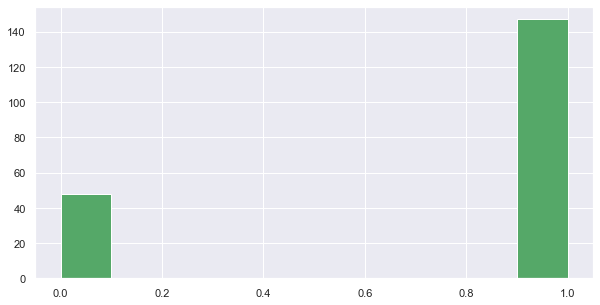

In [8]:
plt.figure(figsize=(10,5)) # Plot dimension
plt.hist(PD_data['status'], color='g') # plots a simple histogram

In [9]:
PD_data['status'].value_counts()   # Number of entries of each status

1    147
0     48
Name: status, dtype: int64

From above it is concludede that 147 patients among 195 patients in dataset has parkinson's disease and 48 patients are healthy

# (2) Study of MDVP:Fo(Hz) - Average vocal fundamental frequency

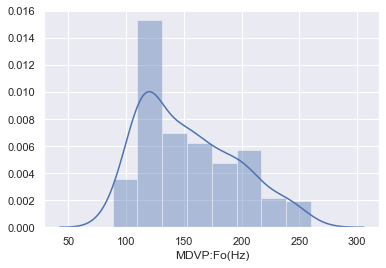

In [84]:
sns.distplot(PD_data['MDVP:Fo(Hz)']) # plots a frequency polygon superimposed on a histogram using the seaborn package.

In [10]:
print("The minimum value of MDVP:Fo(Hz) is: {:.4f}".format(PD_data['MDVP:Fo(Hz)'].min())) 
print("The maximum value of MDVP:Fo(Hz) is: {:.4f}".format(PD_data['MDVP:Fo(Hz)'].max()))
print("The spread of MDVP:Fo(Hz) is: {:.4f}".format(PD_data['MDVP:Fo(Hz)'].max()-PD_data['MDVP:Fo(Hz)'].min()))

The minimum value of MDVP:Fo(Hz) is: 88.3330
The maximum value of MDVP:Fo(Hz) is: 260.1050
The spread of MDVP:Fo(Hz) is: 171.7720


From above it can be seen that MDVP:Fo(Hz) ranges from 88.3330 to 260.1050Hz with a peak around 100 to 150Hz and it is slightly positively skewed

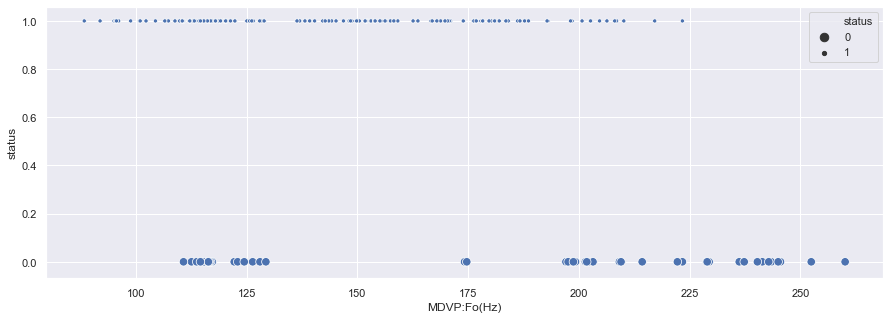

In [11]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:Fo(Hz)'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that average vocal fundamental frequency of healthy patient ranges from 110Hz to 130Hz and 175Hz to 260Hz, whereas for patients having Parkinson's disease it ranges from 88Hz to 225Hz.

# (3) Study of MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

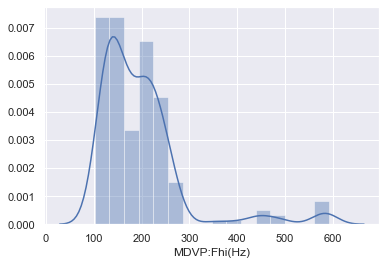

In [12]:
sns.distplot(PD_data['MDVP:Fhi(Hz)']) 

In [13]:
print("The minimum value of MDVP:Fhi(Hz) is: {:.4f}".format(PD_data['MDVP:Fhi(Hz)'].min())) 
print("The maximum value of MDVP:Fhi(Hz) is: {:.4f}".format(PD_data['MDVP:Fhi(Hz)'].max()))
print("The spread of MDVP:Fhi(Hz) is: {:.4f}".format(PD_data['MDVP:Fhi(Hz)'].max()-PD_data['MDVP:Fhi(Hz)'].min()))

The minimum value of MDVP:Fhi(Hz) is: 102.1450
The maximum value of MDVP:Fhi(Hz) is: 592.0300
The spread of MDVP:Fhi(Hz) is: 489.8850


From above it can be seen that MDVP:Fhi(Hz) ranges from 102.1450 to 592.0300Hz having maximum fequency of occurrence around 100 to 200Hz, it is almost symmetrical with outliers around 550 to 600Hz.

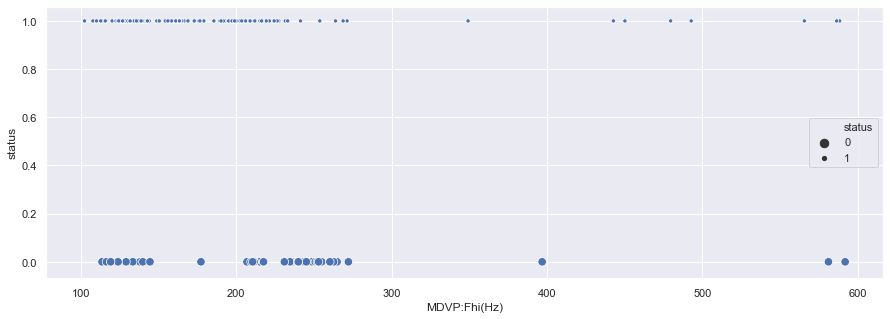

In [14]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:Fhi(Hz)'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that maximum vocal fundamental frequency of healthy patient ranges from 100Hz to 150Hz and 200Hz to 280Hz with some outlier around 400 and 600Hz, whereas for patients having Parkinson's disease it ranges from 102Hz to 290Hz with some outlier upto 600Hz.

# (4) Study of MDVP:Flo(Hz) - Minimum vocal fundamental frequency

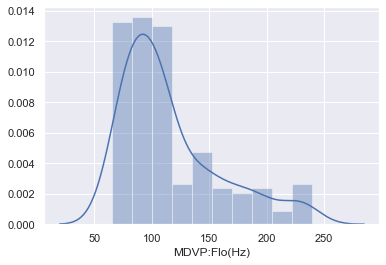

In [15]:
sns.distplot(PD_data['MDVP:Flo(Hz)']) 

In [16]:
print("The minimum value of MDVP:Flo(Hz) is: {:.4f}".format(PD_data['MDVP:Flo(Hz)'].min())) 
print("The maximum value of MDVP:Flo(Hz) is: {:.4f}".format(PD_data['MDVP:Flo(Hz)'].max()))
print("The spread of MDVP:Flo(Hz) is: {:.4f}".format(PD_data['MDVP:Flo(Hz)'].max()-PD_data['MDVP:Flo(Hz)'].min()))

The minimum value of MDVP:Flo(Hz) is: 65.4760
The maximum value of MDVP:Flo(Hz) is: 239.1700
The spread of MDVP:Flo(Hz) is: 173.6940


From above it can be seen that MDVP:Flo(Hz) ranges from 65.4760 to 239.1700Hz having maximum fequency of occurrence around 70 to 120Hz, it is slightly positively skewed.

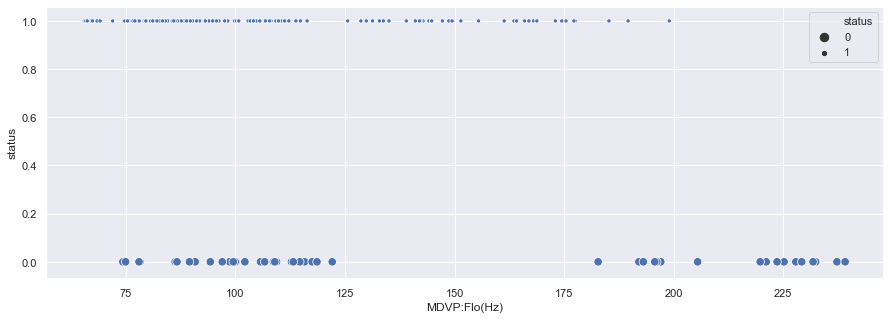

In [17]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:Flo(Hz)'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that minimum vocal fundamental frequency of healthy patient ranges from 75Hz to 125Hz and 180Hz to 239Hz, whereas for patients having Parkinson's disease it ranges from 63Hz to 175Hz with some outlier upto 200Hz.

# Study of MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

# (5) MDVP:Jitter(%)

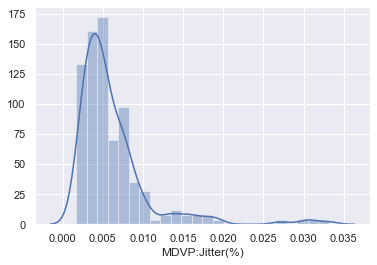

In [29]:
sns.distplot(PD_data['MDVP:Jitter(%)'])

In [18]:
print("The minimum value of MDVP:Jitter(%) is: {:.4f}".format(PD_data['MDVP:Jitter(%)'].min())) 
print("The maximum value of MDVP:Jitter(%) is: {:.4f}".format(PD_data['MDVP:Jitter(%)'].max()))
print("The spread of MDVP:Jitter(%) is: {:.4f}".format(PD_data['MDVP:Jitter(%)'].max()-PD_data['MDVP:Jitter(%)'].min()))

The minimum value of MDVP:Jitter(%) is: 0.0017
The maximum value of MDVP:Jitter(%) is: 0.0332
The spread of MDVP:Jitter(%) is: 0.0315


From above it can be seen that MDVP:Jitter(%) ranges from 0.0017 to 0.0332Hz having maximum fequency of occurrence around 0.005, it is positively skewed with some outliers around 0.030.

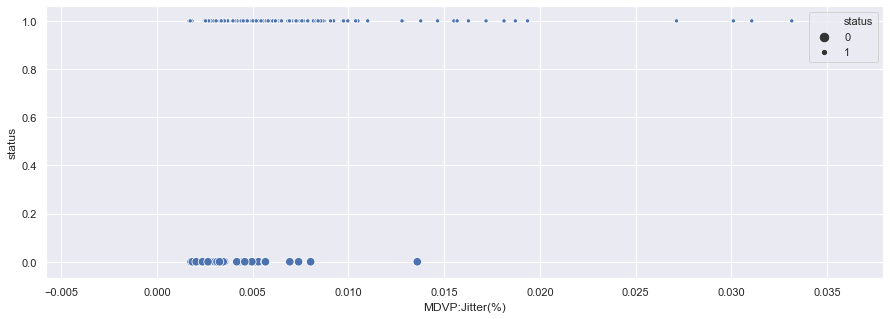

In [19]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:Jitter(%)'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that MDVP:Jitter(%) of healthy patient ranges from 0.001 to 0.008 and with outlier around 0.014, whereas for patients having Parkinson's disease it ranges from 0.001 to 0.02 with some outlier around 0.026 to 0.034.

# (6) MDVP:Jitter(Abs)

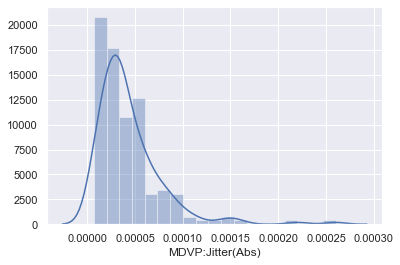

In [20]:
sns.distplot(PD_data['MDVP:Jitter(Abs)'])

In [21]:
print("The minimum value of MDVP:Jitter(Abs) is: {:.4f}".format(PD_data['MDVP:Jitter(Abs)'].min())) 
print("The maximum value of MDVP:Jitter(Abs) is: {:.4f}".format(PD_data['MDVP:Jitter(Abs)'].max()))
print("The spread of MDVP:Jitter(Abs) is: {:.4f}".format(PD_data['MDVP:Jitter(Abs)'].max()-PD_data['MDVP:Jitter(Abs)'].min()))

The minimum value of MDVP:Jitter(Abs) is: 0.0000
The maximum value of MDVP:Jitter(Abs) is: 0.0003
The spread of MDVP:Jitter(Abs) is: 0.0003


From above it can be seen that MDVP:Jitter(Abs) ranges from 0.0000 to 0.0003 having maximum fequency of occurrence around 0.000, it is a little positively skewed.

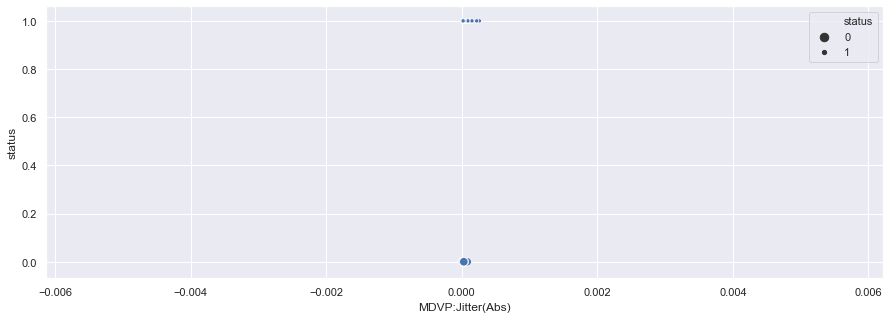

In [22]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:Jitter(Abs)'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that MDVP:Jitter(%) of healthy patient ranges from 0.000 to 0.001, whereas for patients having Parkinson's disease it ranges from 0.000 to 0.003.

# (7) MDVP:RAP

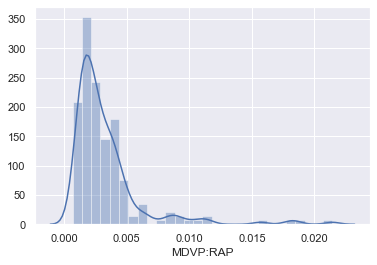

In [23]:
sns.distplot(PD_data['MDVP:RAP'])

In [24]:
print("The minimum value of MDVP:RAP is: {:.4f}".format(PD_data['MDVP:RAP'].min())) 
print("The maximum value of MDVP:RAP is: {:.4f}".format(PD_data['MDVP:RAP'].max()))
print("The spread of MDVP:RAP is: {:.4f}".format(PD_data['MDVP:RAP'].max()-PD_data['MDVP:RAP'].min()))

The minimum value of MDVP:RAP is: 0.0007
The maximum value of MDVP:RAP is: 0.0214
The spread of MDVP:RAP is: 0.0208


From above it can be seen that MDVP:RAP ranges from 0.0007 to 0.0214 having maximum fequency of occurrence around 0.0007 to 0.005, it is positively skewed.

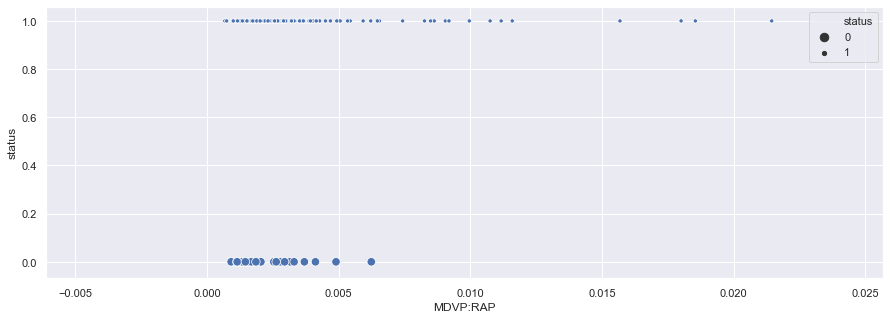

In [25]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:RAP'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that MDVP:RAP of healthy patient ranges from 0.0007 to 0.0060, whereas for patients having Parkinson's disease it ranges from 0.0007 to 0.013 with some outlier from 0.016 to 0.022.

# (8) MDVP:PPQ

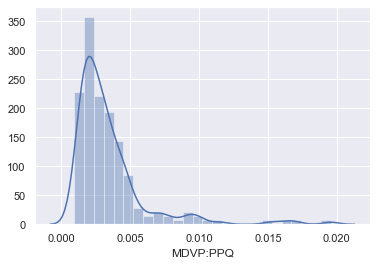

In [26]:
sns.distplot(PD_data['MDVP:PPQ'])

In [27]:
print("The minimum value of MDVP:PPQ is: {:.4f}".format(PD_data['MDVP:PPQ'].min())) 
print("The maximum value of MDVP:PPQ is: {:.4f}".format(PD_data['MDVP:PPQ'].max()))
print("The spread of MDVP:PPQ is: {:.4f}".format(PD_data['MDVP:PPQ'].max()-PD_data['MDVP:PPQ'].min()))

The minimum value of MDVP:PPQ is: 0.0009
The maximum value of MDVP:PPQ is: 0.0196
The spread of MDVP:PPQ is: 0.0187


From above it can be seen that MDVP:PPQ ranges from 0.0009 to 0.0196 having maximum fequency of occurrence around 0.0009 to 0.005, it is positively skewed with some outlier around 0.020

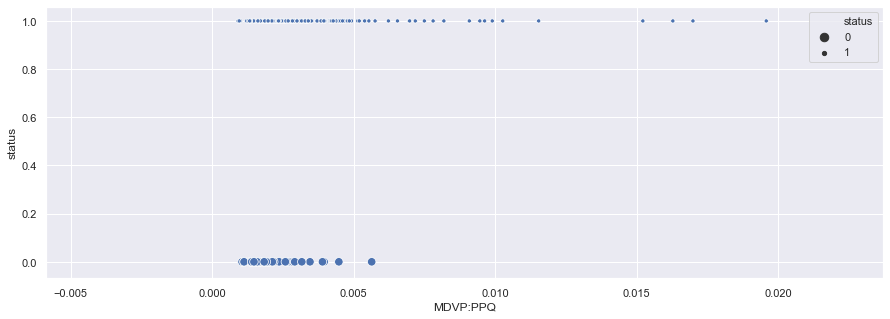

In [28]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:PPQ'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that MDVP:PPQ of healthy patient ranges from 0.0009 to 0.0060, whereas for patients having Parkinson's disease it ranges from 0.0009 to 0.013 with some outlier from 0.015 to 0.020.

# (9) Jitter:DDP

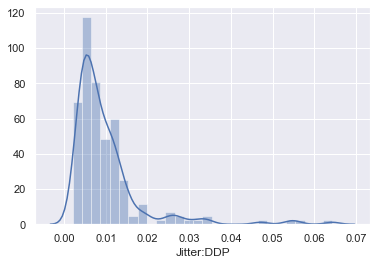

In [29]:
sns.distplot(PD_data['Jitter:DDP'])

In [30]:
print("The minimum value of Jitter:DDP is: {:.4f}".format(PD_data['Jitter:DDP'].min())) 
print("The maximum value of Jitter:DDP is: {:.4f}".format(PD_data['Jitter:DDP'].max()))
print("The spread of Jitter:DDP is: {:.4f}".format(PD_data['Jitter:DDP'].max()-PD_data['Jitter:DDP'].min()))

The minimum value of Jitter:DDP is: 0.0020
The maximum value of Jitter:DDP is: 0.0643
The spread of Jitter:DDP is: 0.0623


From above it can be seen that MDVP:PPQ ranges from 0.0020 to 0.0643 having maximum fequency of occurrence around 0.0020 to 0.010, it is positively skewed with some outlier from 0.05 to 0.07

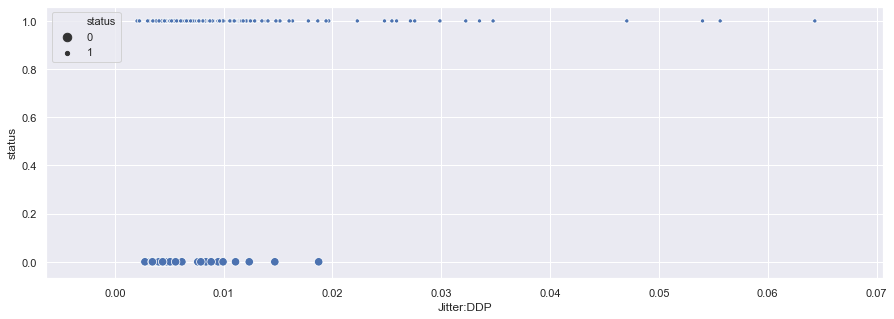

In [31]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['Jitter:DDP'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that Jitter:DDP of healthy patient ranges from 0.0020 to 0.020, whereas for patients having Parkinson's disease it ranges from 0.0020 to 0.035 with some outlier from 0.047 to 0.0623

# Study of MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - Several measures of variation in amplitude

# (10) MDVP:Shimmer

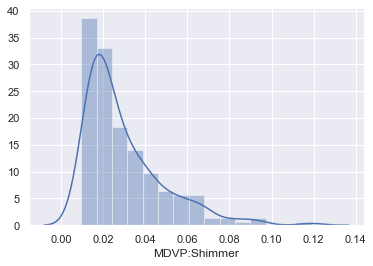

In [39]:
sns.distplot(PD_data['MDVP:Shimmer'])

In [32]:
print("The minimum value of MDVP:Shimmer is: {:.4f}".format(PD_data['MDVP:Shimmer'].min())) 
print("The maximum value of MDVP:Shimmer is: {:.4f}".format(PD_data['MDVP:Shimmer'].max()))
print("The spread of MDVP:Shimmer is: {:.4f}".format(PD_data['MDVP:Shimmer'].max()-PD_data['MDVP:Shimmer'].min()))

The minimum value of MDVP:Shimmer is: 0.0095
The maximum value of MDVP:Shimmer is: 0.1191
The spread of MDVP:Shimmer is: 0.1095


From above it can be seen that MDVP:Shimmer ranges from 0.0095 to 0.1191 having maximum fequency of occurrence around 0.0095 to 0.030, it is positively skewed.

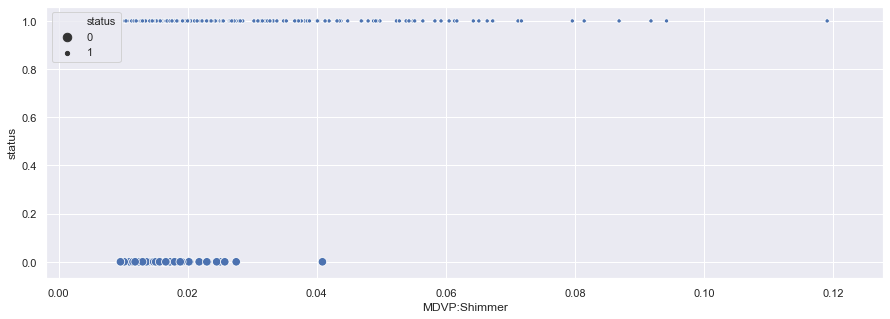

In [33]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:Shimmer'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that MDVP:Shimmer of healthy patient ranges from  0.0095 to 0.040, whereas for patients having Parkinson's disease it ranges from  0.0095 to 0.090 with some outlier around 0.12.

# (11) MDVP:Shimmer(dB)

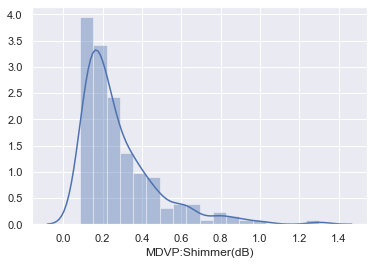

In [34]:
sns.distplot(PD_data['MDVP:Shimmer(dB)'])

In [35]:
print("The minimum value of MDVP:Shimmer(dB) is: {:.4f}".format(PD_data['MDVP:Shimmer(dB)'].min())) 
print("The maximum value of MDVP:Shimmer(dB) is: {:.4f}".format(PD_data['MDVP:Shimmer(dB)'].max()))
print("The spread of MDVP:Shimmer(dB) is: {:.4f}".format(PD_data['MDVP:Shimmer(dB)'].max()-PD_data['MDVP:Shimmer(dB)'].min()))

The minimum value of MDVP:Shimmer(dB) is: 0.0850
The maximum value of MDVP:Shimmer(dB) is: 1.3020
The spread of MDVP:Shimmer(dB) is: 1.2170


From above it can be seen that MDVP:Shimmer(dB) ranges from 0.0850 to 1.3020 having maximum fequency of occurrence around 0.0850 to 0.040, it is positively skewed.

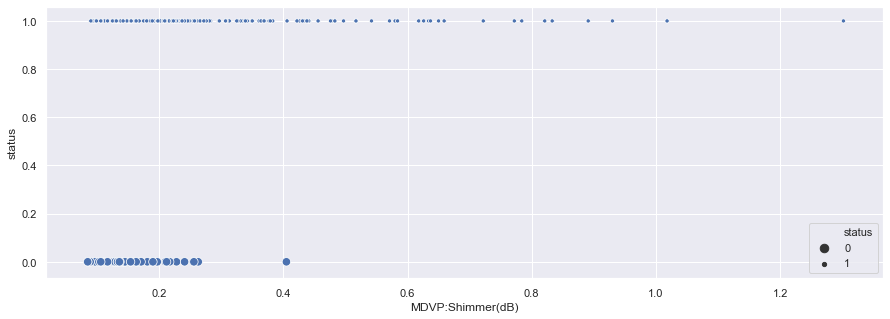

In [36]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:Shimmer(dB)'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that MDVP:Shimmer(dB) of healthy patient ranges from 0.0850 to 0.040, whereas for patients having Parkinson's disease it ranges from 0.0850 to 1.01 with some outlier around 1.3.

# (12) Shimmer:APQ3

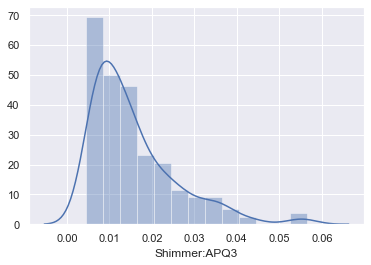

In [37]:
sns.distplot(PD_data['Shimmer:APQ3'])

In [38]:
print("The minimum value of Shimmer:APQ3 is: {:.4f}".format(PD_data['Shimmer:APQ3'].min())) 
print("The maximum value of Shimmer:APQ3 is: {:.4f}".format(PD_data['Shimmer:APQ3'].max()))
print("The spread of Shimmer:APQ3 is: {:.4f}".format(PD_data['Shimmer:APQ3'].max()-PD_data['Shimmer:APQ3'].min()))

The minimum value of Shimmer:APQ3 is: 0.0046
The maximum value of Shimmer:APQ3 is: 0.0565
The spread of Shimmer:APQ3 is: 0.0519


From above it can be seen that Shimmer:APQ3 ranges from 0.0046 to 0.0565 having maximum fequency of occurrence around 0.0046 to 0.020, it is positively skewed.

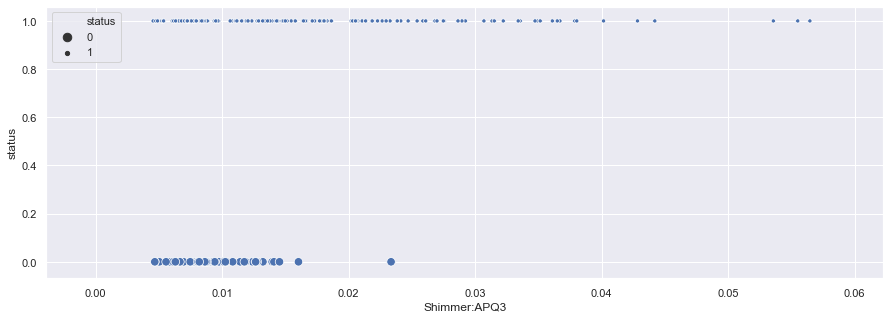

In [39]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['Shimmer:APQ3'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that Shimmer:APQ3 of healthy patient ranges from 0.0046 to 0.025, whereas for patients having Parkinson's disease it ranges from 0.0046 to 0.045 with some outlier around 0.052 to 0.057.

# (13) Shimmer:APQ5

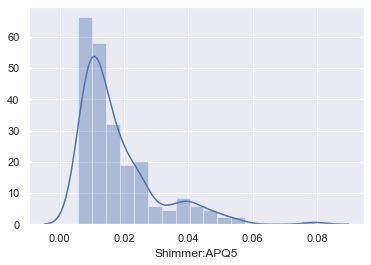

In [40]:
sns.distplot(PD_data['Shimmer:APQ5'])

In [41]:
print("The minimum value of Shimmer:APQ5 is: {:.4f}".format(PD_data['Shimmer:APQ5'].min())) 
print("The maximum value of Shimmer:APQ5 is: {:.4f}".format(PD_data['Shimmer:APQ5'].max()))
print("The spread of Shimmer:APQ5 is: {:.4f}".format(PD_data['Shimmer:APQ5'].max()-PD_data['Shimmer:APQ5'].min()))

The minimum value of Shimmer:APQ5 is: 0.0057
The maximum value of Shimmer:APQ5 is: 0.0794
The spread of Shimmer:APQ5 is: 0.0737


From above it can be seen that Shimmer:APQ5 ranges from 0.0057 to 0.0794 having maximum fequency of occurrence around 0.0057 to 0.030, it is positively skewed.

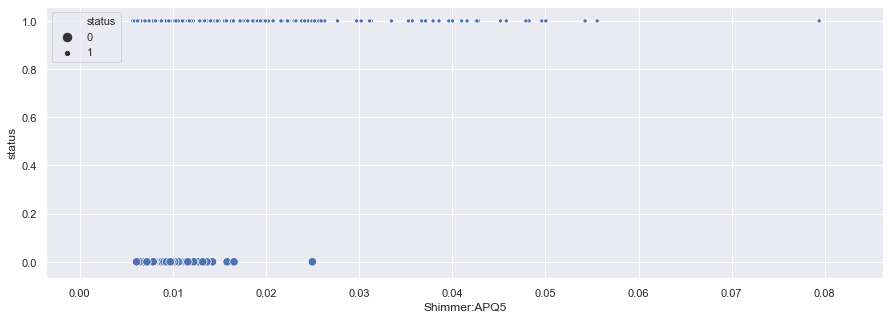

In [109]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['Shimmer:APQ5'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that Shimmer:APQ5 of healthy patient ranges from 0.0057 to 0.025, whereas for patients having Parkinson's disease it ranges from 0.0057 to 0.057 with outlier around 0.08.

# (14) MDVP:APQ 

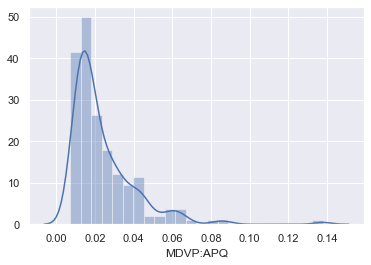

In [42]:
sns.distplot(PD_data['MDVP:APQ'])

In [43]:
print("The minimum value of MDVP:APQ is: {:.4f}".format(PD_data['MDVP:APQ'].min())) 
print("The maximum value of MDVP:APQ is: {:.4f}".format(PD_data['MDVP:APQ'].max()))
print("The spread of MDVP:APQ is: {:.4f}".format(PD_data['MDVP:APQ'].max()-PD_data['MDVP:APQ'].min()))

The minimum value of MDVP:APQ is: 0.0072
The maximum value of MDVP:APQ is: 0.1378
The spread of MDVP:APQ is: 0.1306


From above it can be seen that MDVP:APQ ranges from 0.0072 to 0.1378 having maximum fequency of occurrence around 0.0072 to 0.040, it is positively skewed.

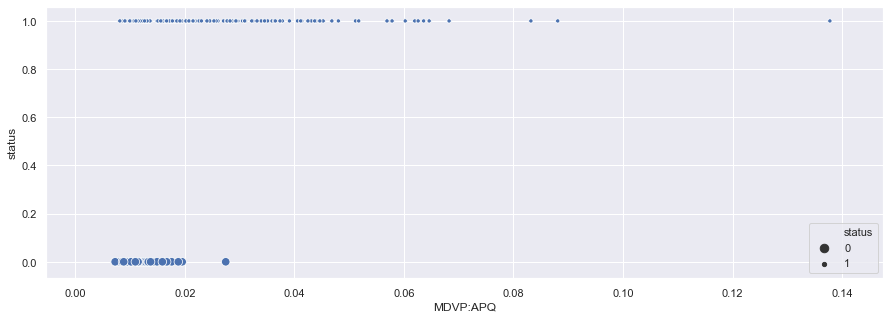

In [110]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['MDVP:APQ'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that MDVP:APQ of healthy patient ranges from 0.0072 to 0.030, whereas for patients having Parkinson's disease it ranges from 0.0072 to 0.090 with some outlier around 0.14.

# (15) Shimmer:DDA

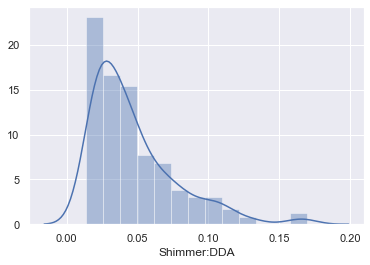

In [44]:
sns.distplot(PD_data['Shimmer:DDA'])

In [45]:
print("The minimum value of Shimmer:DDA is: {:.4f}".format(PD_data['Shimmer:DDA'].min())) 
print("The maximum value of Shimmer:DDA is: {:.4f}".format(PD_data['Shimmer:DDA'].max()))
print("The spread of Shimmer:DDA is: {:.4f}".format(PD_data['Shimmer:DDA'].max()-PD_data['Shimmer:DDA'].min()))

The minimum value of Shimmer:DDA is: 0.0136
The maximum value of Shimmer:DDA is: 0.1694
The spread of Shimmer:DDA is: 0.1558


From above it can be seen that Shimmer:DDA ranges from 0.0136 to 0.1694 having maximum fequency of occurrence around 0.0136 to 0.070, it is positively skewed.

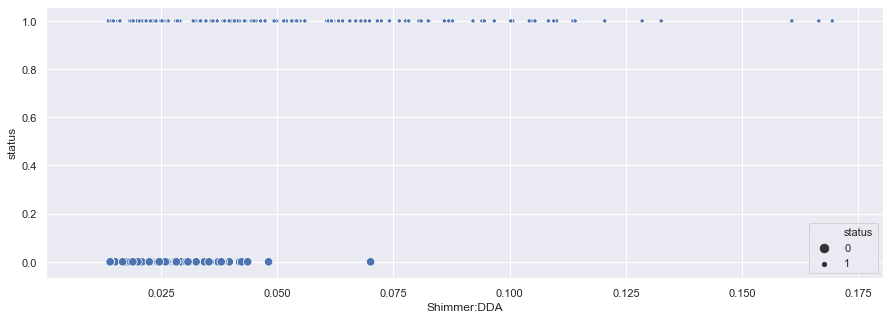

In [46]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['Shimmer:DDA'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that Shimmer:DDA of healthy patient ranges from 0.0136 to 0.070, whereas for patients having Parkinson's disease it ranges from 0.0136 to 0.135 with some outlier around 0.160 to 0.170.

# NHR,HNR - Two measures of ratio of noise to tonal components in the voice

# (16) NHR

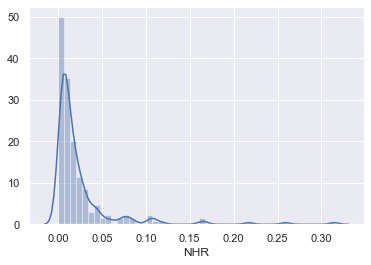

In [47]:
sns.distplot(PD_data['NHR'])

In [48]:
print("The minimum value of NHR is: {:.4f}".format(PD_data['NHR'].min())) 
print("The maximum value of NHR is: {:.4f}".format(PD_data['NHR'].max()))
print("The spread of NHR is: {:.4f}".format(PD_data['NHR'].max()-PD_data['NHR'].min()))

The minimum value of NHR is: 0.0006
The maximum value of NHR is: 0.3148
The spread of NHR is: 0.3142


From above it can be seen that NHR ranges from 0.0006 to 0.3148 having maximum fequency of occurrence around 0.0006 to 0.040, it is positively skewed with some outlier around 0.30.

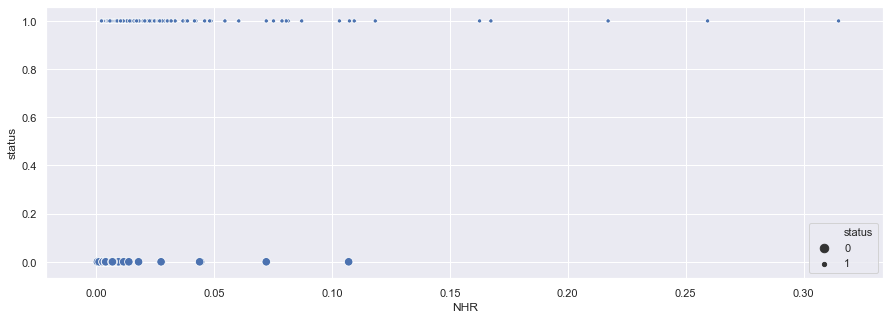

In [49]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['NHR'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that NHR of healthy patient ranges from 0.0006 to 0.11, whereas for patients having Parkinson's disease it ranges from 0.0006 to 0.13 with some outlier around 0.30.

# (17) HNR

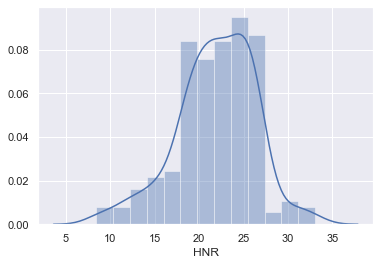

In [50]:
sns.distplot(PD_data['HNR'])

In [51]:
print("The minimum value of HNR is: {:.4f}".format(PD_data['HNR'].min())) 
print("The maximum value of HNR is: {:.4f}".format(PD_data['HNR'].max()))
print("The spread of HNR is: {:.4f}".format(PD_data['HNR'].max()-PD_data['HNR'].min()))

The minimum value of HNR is: 8.4410
The maximum value of HNR is: 33.0470
The spread of HNR is: 24.6060


From above it can be seen that HNR ranges from 8.4410 to 33.0470 having maximum fequency of occurrence around 17 to 26, it slightly negatively skewed.

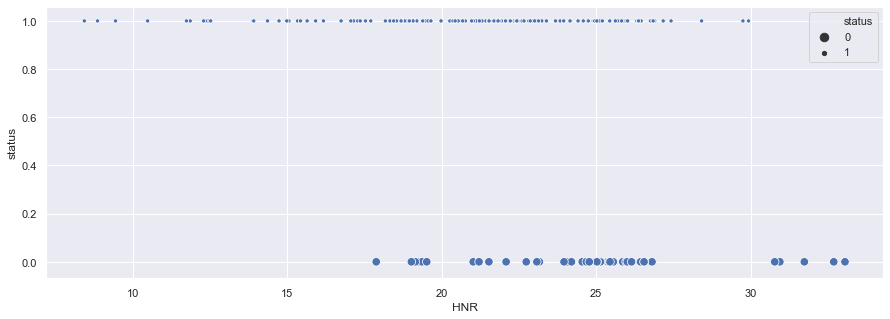

In [53]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['HNR'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that HNR of healthy patient ranges from 17 to 27 and 31 to 33, whereas for patients having Parkinson's disease it ranges from 8.4410 to 30.

# (18) RPDE 

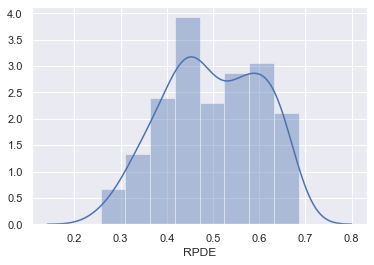

In [54]:
sns.distplot(PD_data['RPDE'])

In [55]:
print("The minimum value of RPDE is: {:.4f}".format(PD_data['RPDE'].min())) 
print("The maximum value of RPDE is: {:.4f}".format(PD_data['RPDE'].max()))
print("The spread of RPDE is: {:.4f}".format(PD_data['RPDE'].max()-PD_data['RPDE'].min()))

The minimum value of RPDE is: 0.2566
The maximum value of RPDE is: 0.6852
The spread of RPDE is: 0.4286


From above it can be seen that RPDE ranges from 0.2566 to 0.6852 having maximum fequency of occurrence around 0.40 to 0.68, it is almost symmetrical.

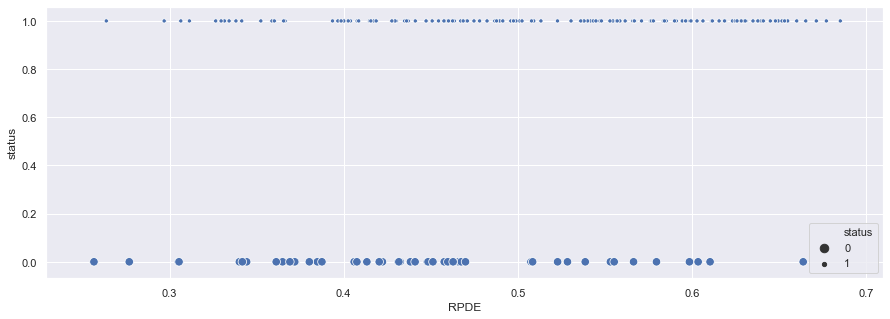

In [56]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['RPDE'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that RPDE of healthy and patients having Parkinson's disease has equal spread of range.

# (19) DFA

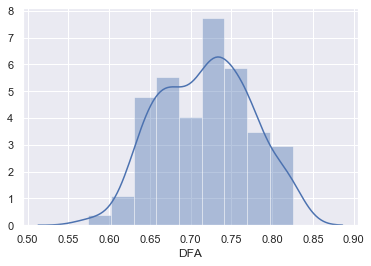

In [57]:
sns.distplot(PD_data['DFA'])

In [58]:
print("The minimum value of DFA is: {:.4f}".format(PD_data['DFA'].min())) 
print("The maximum value of DFA is: {:.4f}".format(PD_data['DFA'].max()))
print("The spread of DFA is: {:.4f}".format(PD_data['DFA'].max()-PD_data['DFA'].min()))

The minimum value of DFA is: 0.5743
The maximum value of DFA is: 0.8253
The spread of DFA is: 0.2510


From above it can be seen that DFA ranges from 0.5743 to 0.8253 having maximum fequency of occurrence around 0.62 to 0.82, it is almost symmetrical.

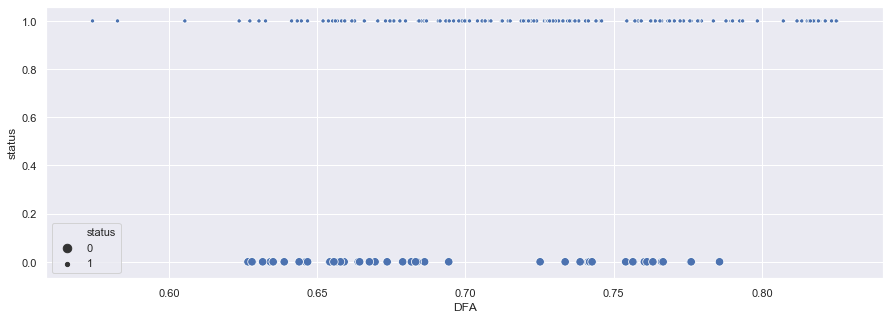

In [59]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['DFA'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that DFA of healthy patient ranges from 0.63 to 0.79, whereas for patients having Parkinson's disease it ranges from 0.5743 to 0.8253.

# (20) spread1

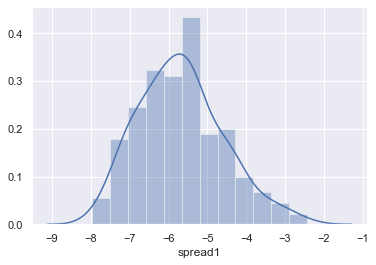

In [60]:
sns.distplot(PD_data['spread1'])

In [61]:
print("The minimum value of spread1 is: {:.4f}".format(PD_data['spread1'].min())) 
print("The maximum value of spread1 is: {:.4f}".format(PD_data['spread1'].max()))
print("The spread of spread1 is: {:.4f}".format(PD_data['spread1'].max()-PD_data['spread1'].min()))

The minimum value of spread1 is: -7.9650
The maximum value of spread1 is: -2.4340
The spread of spread1 is: 5.5310


From above it can be seen that spread1 ranges from -7.9650 to -2.4340 having maximum fequency of occurrence around -7.5 to -4, it is almost symmetrical.

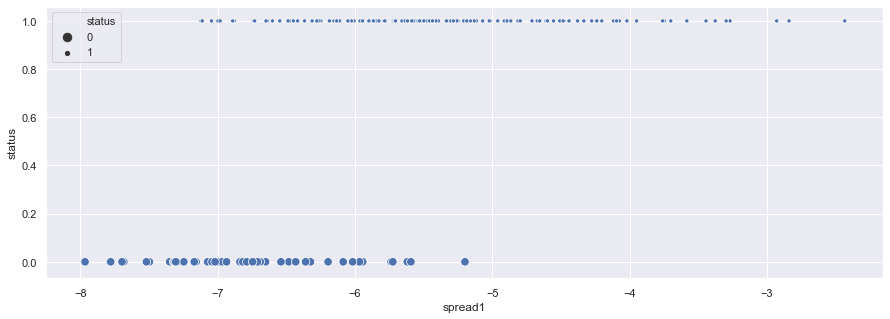

In [62]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['spread1'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that spread1 of healthy patient ranges from -7.9650 to -5.1, whereas for patients having Parkinson's disease it ranges from -7.1 to -2.4340.

# (21) spread2

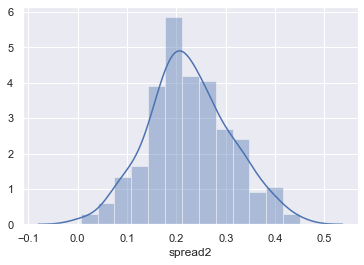

In [63]:
sns.distplot(PD_data['spread2'])

In [64]:
print("The minimum value of spread2 is: {:.4f}".format(PD_data['spread2'].min())) 
print("The maximum value of spread2 is: {:.4f}".format(PD_data['spread2'].max()))
print("The spread of spread2 is: {:.4f}".format(PD_data['spread2'].max()-PD_data['spread2'].min()))

The minimum value of spread2 is: 0.0063
The maximum value of spread2 is: 0.4505
The spread of spread2 is: 0.4442


From above it can be seen that spread2 ranges from 0.0063 to 0.4505 having maximum fequency of occurrence around 0.15 to 0.35, it is almost symmetrical.

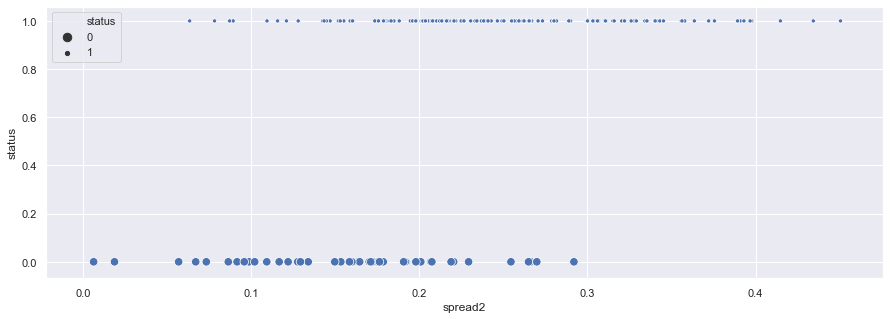

In [65]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['spread2'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that spread2 of healthy patient ranges from 0.0063 to 0.3, whereas for patients having Parkinson's disease it ranges from 0.06 to 0.4505.

# (22) D2

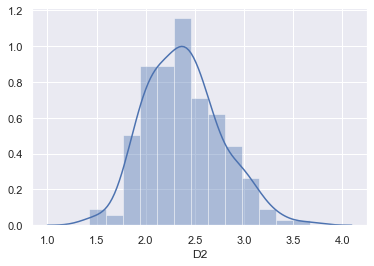

In [66]:
sns.distplot(PD_data['D2'])

In [67]:
print("The minimum value of D2 is: {:.4f}".format(PD_data['D2'].min())) 
print("The maximum value of D2 is: {:.4f}".format(PD_data['D2'].max()))
print("The spread of D2 is: {:.4f}".format(PD_data['D2'].max()-PD_data['D2'].min()))

The minimum value of D2 is: 1.4233
The maximum value of D2 is: 3.6712
The spread of D2 is: 2.2479


From above it can be seen that D2 ranges from 1.4233 to 3.6712 having maximum fequency of occurrence around 1.7 to 3.1, it is almost symmetrical.

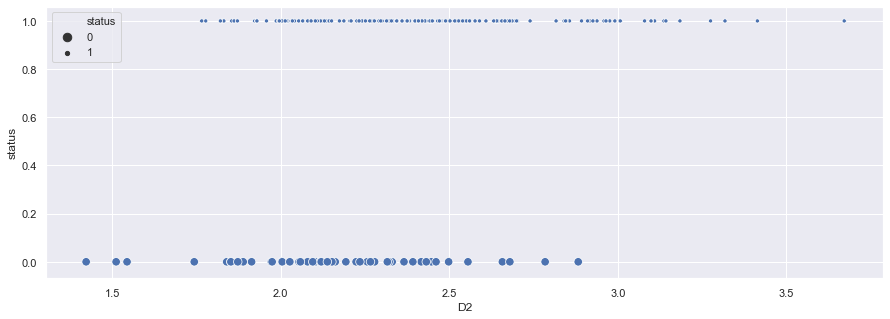

In [68]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['D2'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that D2 of healthy patient ranges from 1.4233 to 2.9, whereas for patients having Parkinson's disease it ranges from 1.65 to 3.6712.

# (23) PPE

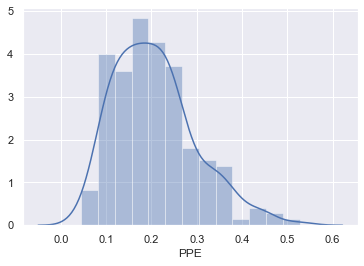

In [69]:
sns.distplot(PD_data['PPE'])

In [70]:
print("The minimum value of PPE is: {:.4f}".format(PD_data['PPE'].min())) 
print("The maximum value of PPE is: {:.4f}".format(PD_data['PPE'].max()))
print("The spread of PPE is: {:.4f}".format(PD_data['PPE'].max()-PD_data['PPE'].min()))

The minimum value of PPE is: 0.0445
The maximum value of PPE is: 0.5274
The spread of PPE is: 0.4828


From above it can be seen that PPE ranges from 0.0445 to 0.5274 having maximum fequency of occurrence around 0.1 to 0.39, it is almost symmetrical.

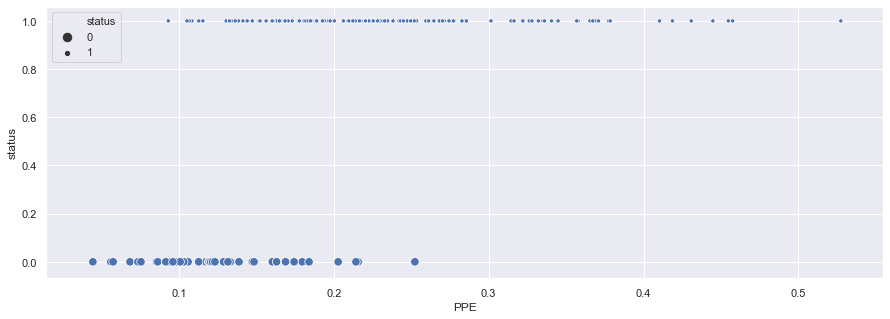

In [71]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=PD_data['PPE'],y=PD_data['status'], data=PD_data, size = "status") # scatter plot

From above it is seen that PPE of healthy patient ranges from 0.0445 to 0.25, whereas for patients having Parkinson's disease it ranges from 0.09 to 0.5274.

# Study of Relationship between variables of data

# Correlation

In [72]:
PD_data_var=PD_data.drop("name", axis=1) #Removing name from data as it does not effect the analysis
PD_data_var.corr()  # prints the correlation coefficient between every pair of attributes

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


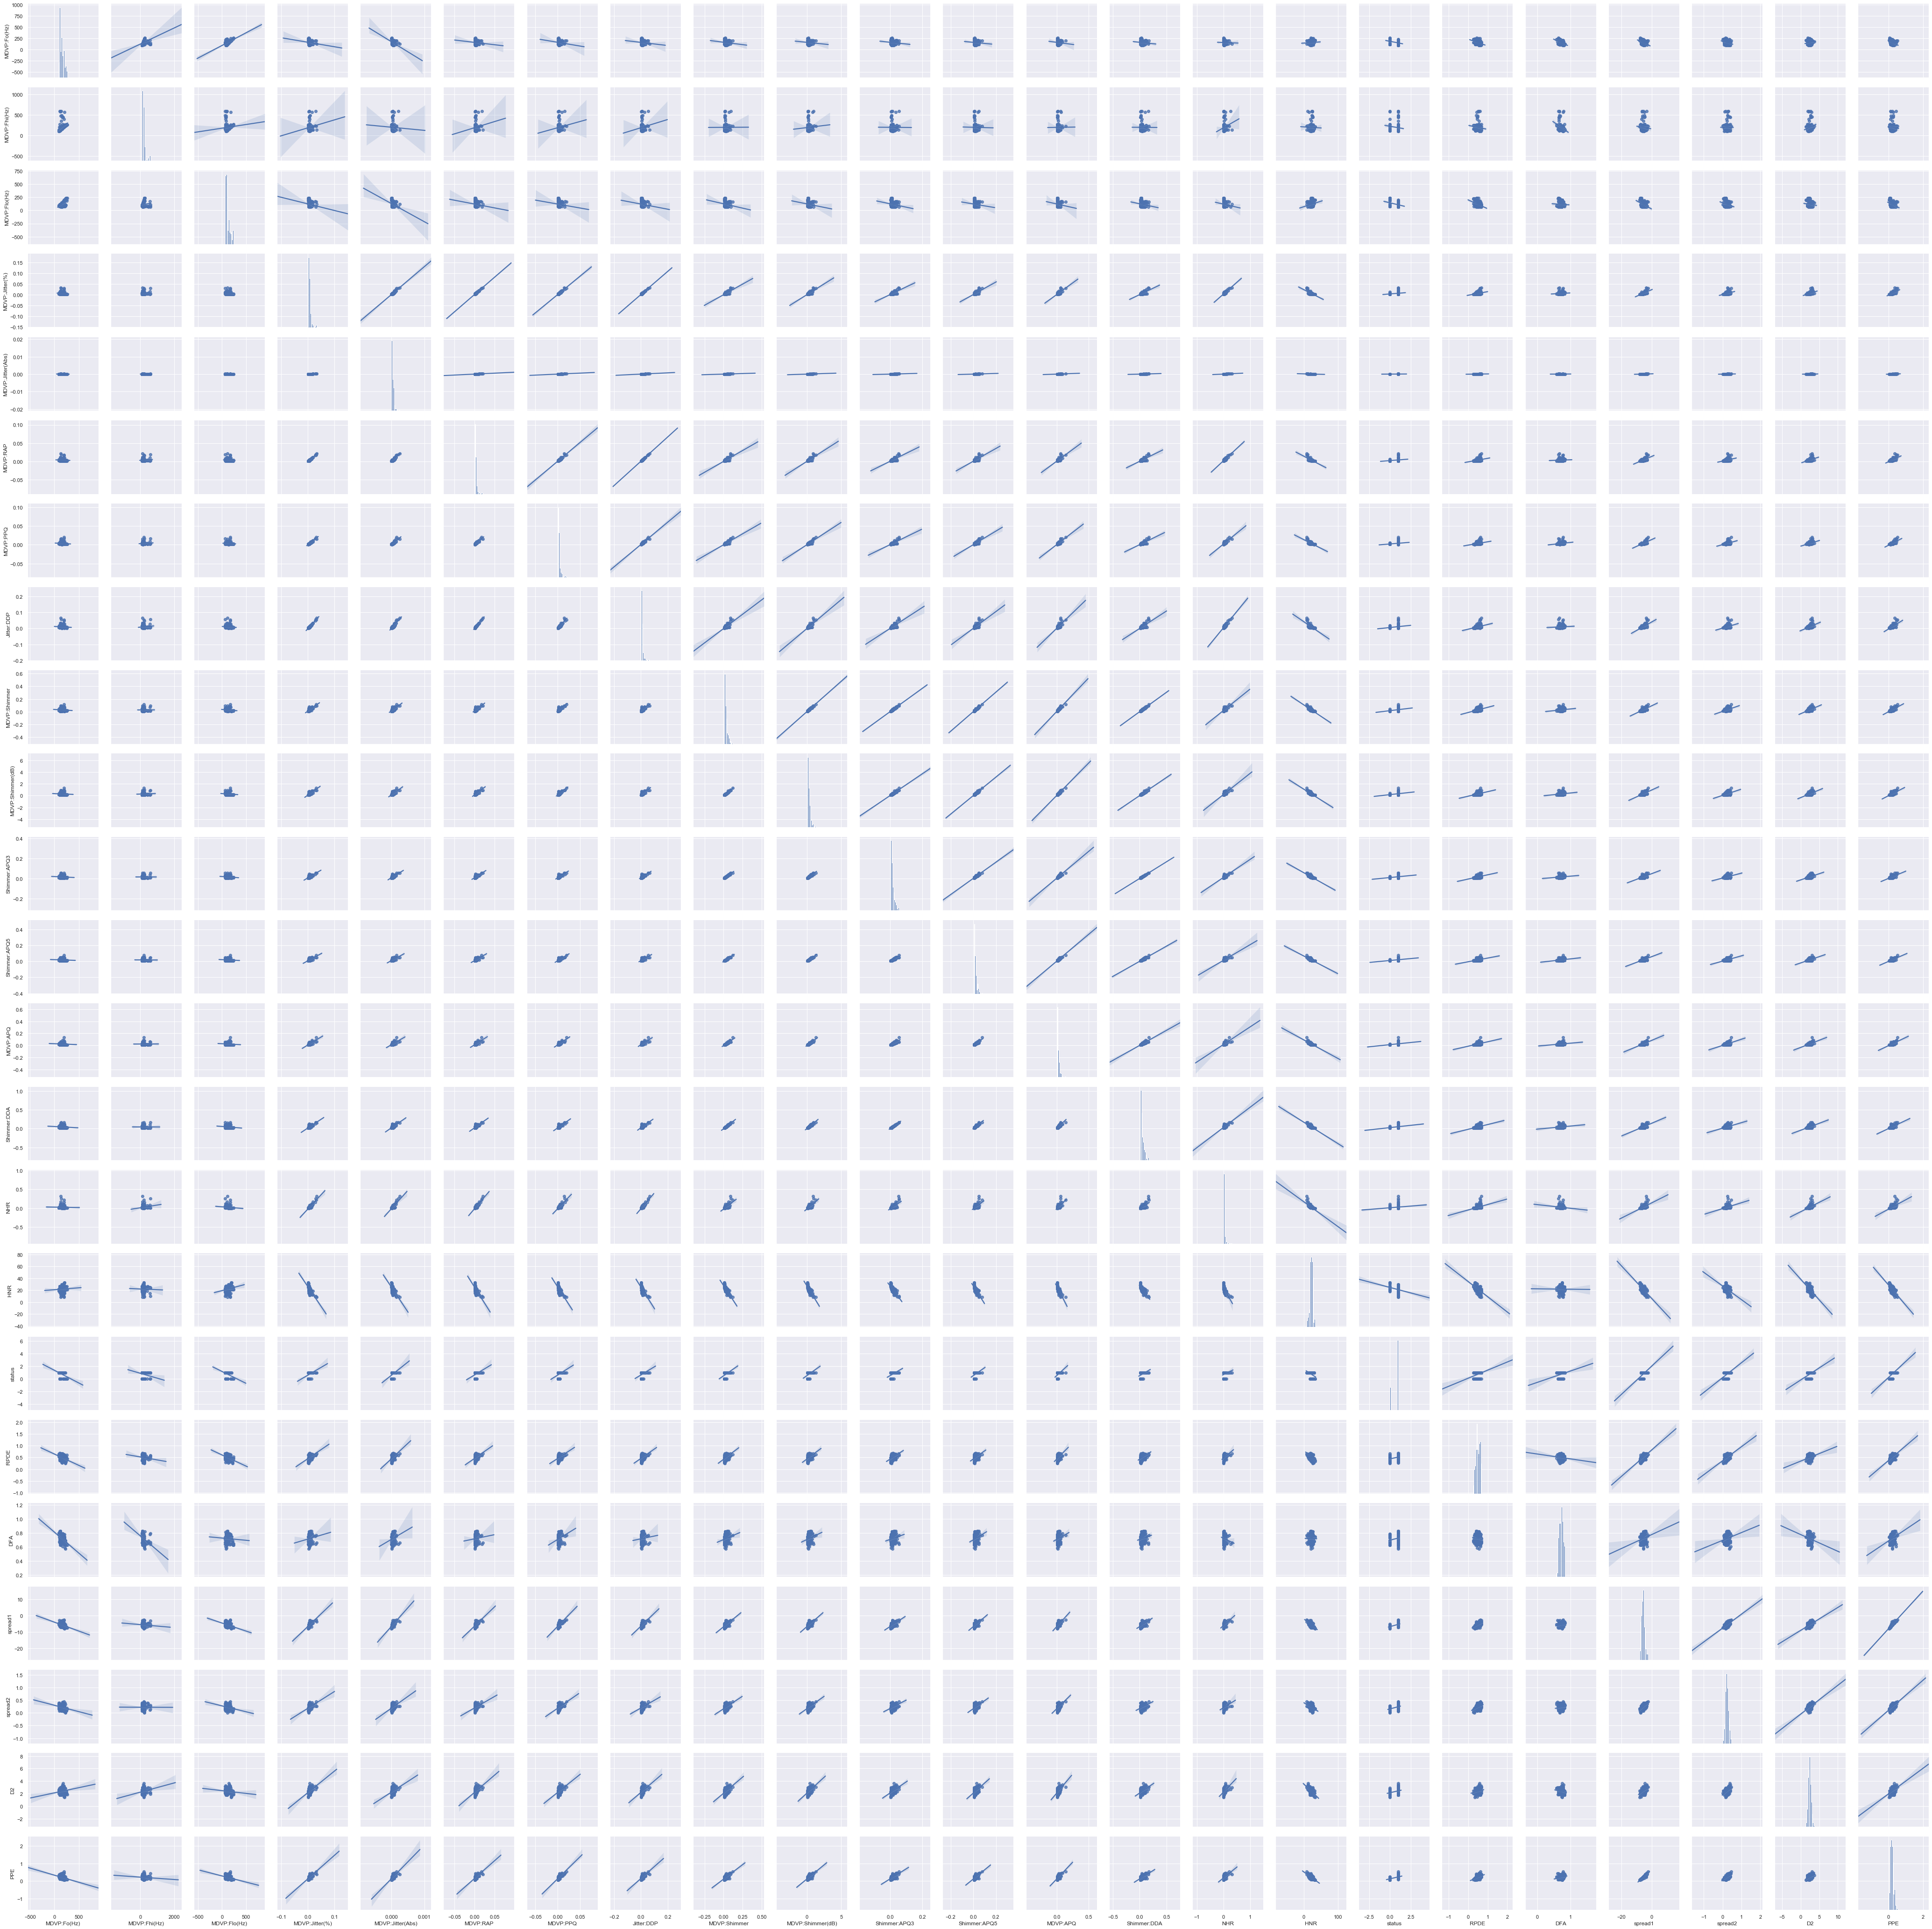

In [73]:
sns.pairplot(PD_data_var, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

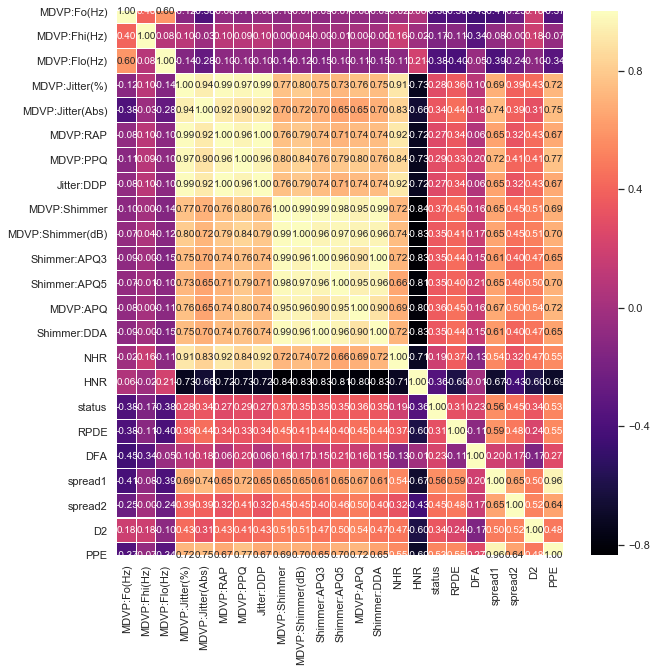

In [74]:
#plots Heatmap For checking the correlation
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(PD_data_var.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  
plt.show() # the color intensity is based on correlation facror

From above it is infered that:
    1. MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ and Jitter:DDP are highly correlated with each other so we can keep only one (say MDVP:Jitter(%)) among all and drop others to make estimation process simpler.
    2. Similarly MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ and Shimmer:DDA are highly correlated with each other so we can keep only one (say MDVP:Shimmer) among all and drop others to make estimation process simpler.
    3. Similarly spread1 and PPE are highly correlated with each other so we can drop PPE to make estimation process simpler.

# 5. Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc (5 points)

# Dealing with Duplicates in your data

In [75]:
#Identify duplicates records in the data
dupes = PD_data.duplicated()
sum(dupes)

0

From above it is seen that there is no duplicate data in the record

# Checking the dataset missing values

In [76]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
null_value=PD_data.isnull().sum()
sum(null_value)

0

From above it is seen that there is no null value in the record

# Dealing with incorrect or unwanted observations

In [77]:
PD_data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


From above it is observed that there is incorrect or unwanted observations in the record

# Dealing with Outliers

In [86]:
#Selecting the attributes by dropping name and status of patient from data as well as taking only one among hifghly correlated attribute and drop others.
PD_data_Attr=PD_data.drop(['name','status','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA','PPE'],axis=1)
print("dimension of data attributes after droping is :",PD_data_Attr.shape)

dimension of data attributes after droping is : (195, 12)


In [87]:
Q1 =PD_data_Attr.quantile(0.25)
Q3 = PD_data_Attr.quantile(0.75)
IQR=Q3-Q1
np.where((PD_data_Attr < (Q1 - 1.5 * IQR)) | (PD_data_Attr > (Q3 + 1.5 * IQR))) #check where data have outliers.

(array([ 17,  42,  43,  44,  45,  46,  63,  65,  73,  89,  89,  90,  91,
         97,  98,  98,  99,  99, 100, 100, 100, 100, 101, 101, 102, 102,
        102, 102, 115, 115, 116, 117, 118, 120, 146, 146, 146, 147, 147,
        148, 148, 148, 149, 149, 149, 149, 150, 150, 151, 151, 151, 151,
        151, 151, 152, 152, 152, 152, 152, 157, 157, 164, 166, 167, 170,
        186, 187, 192, 192, 193, 193], dtype=int64),
 array([ 9,  2,  2,  2,  2,  2,  2, 10,  1,  5, 11,  5,  4,  5,  3,  5,  3,
         5,  3,  4,  5,  6,  3,  5,  1,  3,  4,  5,  1,  5,  1,  1,  1,  1,
         3,  4,  5,  3,  5,  3,  4,  5,  1,  3,  4,  5,  3,  5,  3,  4,  5,
         6,  9, 10,  3,  4,  5,  6,  9,  3,  5,  9,  2,  2,  2,  1,  1,  3,
         5,  1,  5], dtype=int64))

In [88]:
PD_data_Attr_without = PD_data_Attr[~((PD_data_Attr < (Q1 - 1.5 * IQR)) |(PD_data_Attr > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
print("Dimension of data attribute without any outlier is :",PD_data_Attr_without.shape)

Dimension of data attribute without any outlier is : (156, 12)


In [89]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(PD_data_Attr < Q1 - 1.5 * IQR)[0], np.where(PD_data_Attr < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    PD_data_Attr.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(PD_data_Attr > Q3 + 1.5 * IQR)[0], np.where(PD_data_Attr > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    PD_data_Attr.iloc[i,j] = whisker[j]

PD_data_Attr.shape    

(195, 12)

In [90]:
np.where((PD_data_Attr < (Q1 - 1.5 * IQR)) | (PD_data_Attr > (Q3 + 1.5 * IQR))) #again check if data have outliers.

(array([], dtype=int64), array([], dtype=int64))

From above it can be inferred that now every outlier is taken care of.

# Normalization of continuous data attributes

In [91]:
PD_data_Attr_Scaled=PD_data_Attr.apply(zscore) #normalising the attributes by applying z-score so that scaling can be removed
PD_data_Attr_Scaled.head(10) #Gives description of initial 10 rows of normalized data.

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2
0,-0.829300,-0.500094,-0.964110,0.701875,0.885615,0.236191,-0.201203,-0.807838,1.760814,0.810831,0.482584,-0.209449
1,-0.770972,-0.638805,-0.050885,1.308591,1.943849,0.063834,-0.648894,-0.387524,1.837562,1.494886,1.316596,0.280817
2,-0.909476,-0.919993,-0.104142,1.578975,1.402105,-0.315105,-0.288994,-0.662075,1.942048,1.153723,1.021926,-0.101522
3,-0.909622,-0.811616,-0.108588,1.404215,1.557834,-0.288212,-0.290603,-0.613134,1.832380,1.455661,1.299181,0.065842
4,-0.925657,-0.748930,-0.125313,2.350560,2.118818,-0.035179,-0.519275,-0.783021,1.909364,1.798426,0.096775,-0.128172
5,-0.815735,-0.919176,-0.051638,1.308591,1.082230,-0.368279,-0.121915,-0.800305,1.938081,1.339434,0.876358,-0.510575
6,-0.822638,-0.821668,-0.027338,-0.785239,-0.777497,-0.744162,0.684296,0.940483,0.833662,0.049406,0.376384,-1.390494
7,-1.135957,-1.196885,-0.274451,-0.927026,-0.802149,-0.904905,1.145316,1.339616,0.818262,-0.445002,-0.516195,-0.835458
8,-1.416988,-0.904650,-0.569929,-0.066412,-0.485881,-0.461180,-0.022173,1.128677,1.005330,0.175163,1.222210,-0.153739
9,-1.433314,-1.096475,-0.582349,-0.129062,-0.037935,-0.490517,-0.010682,0.467823,1.456033,0.626477,1.200813,0.137865


# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points)

In [92]:
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
RANDOM_SEED=50 #Fixing the random seed number

In [93]:
X=PD_data_Attr_Scaled #input attributes are all the normalised attributes taken from above
y=PD_data["status"] #Target attribute is status of patient indicating whether having Parkinson’s Disease (=1) or healthy (=0)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=RANDOM_SEED) #split the data into test=30% and train=70%

print("{0:0.2f}% data is in training set".format((len(X_train)/len(PD_data.index)) * 100)) #prints the percentage of data in training set
print("{0:0.2f}% data is in test set".format((len(X_test)/len(PD_data.index)) * 100)) #prints the percentage of data in test set

print("Dimension of training input attribute = ",X_train.shape) #prints the dimension of training input attribute
print("Dimension of test input attribute = ",X_test.shape) #prints the dimension of test input attribute
print("Dimension of training target attribute = ",y_train.shape) #prints the dimension of training target attribute
print("Dimension of test target attribute = ",y_test.shape) #prints the dimension of test target attribute

69.74% data is in training set
30.26% data is in test set
Dimension of training input attribute =  (136, 12)
Dimension of test input attribute =  (59, 12)
Dimension of training target attribute =  (136,)
Dimension of test target attribute =  (59,)


# 6. Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data (10 points)

# Logistic Regression Model

In [162]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic model
Logistic_model = LogisticRegression(solver="liblinear")

# Fit the Logistic model on train data
Logistic_model.fit(X_train, y_train)

# Predict the output on test data of Logistic model
Logistic_y_predict = Logistic_model.predict(X_test)

print("Parameters of Logistic model is: \n",Logistic_model.fit(X_train, y_train))
print("The predicted output for test data in logistic model is: \n",Logistic_y_predict)

Parameters of Logistic model is: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
The predicted output for test data in logistic model is: 
 [1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [156]:
# Print the coefficient of Logistic model model
Logistic_coef_df = pd.DataFrame(Logistic_model.coef_)
Logistic_coef_df['intercept'] = Logistic_model.intercept_
print("Coefficient and intercept of Logistic Regression Model = \n",Logistic_coef_df)

Coefficient and intercept of Logistic Regression Model = 
           0         1         2         3         4         5         6  \
0 -0.059596 -0.379603 -0.332768 -0.353499  0.371741  0.060382 -0.009897   

          7         8         9        10        11  intercept  
0 -0.278888  0.068597  1.651885  0.430927  0.405268   1.953995  


# Accuracy of Logistic model on train and test data

In [96]:
Logistic_train_accuracy = Logistic_model.score(X_train, y_train)
print("Accuracy of Logistic model on Train data is {0:.4f}%".format(Logistic_train_accuracy))
Logistic_test_accuracy = Logistic_model.score(X_test, y_test)
print("Accuracy of Logistic model on Test data is {0:.4f}%".format(Logistic_test_accuracy))

Accuracy of Logistic model on Train data is 0.8676%
Accuracy of Logistic model on Test data is 0.8644%


# Naive Bayes Model

In [161]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# Create the Naive Bayes model
NB_model = GaussianNB()

# Fit the Naive Bayes model on train data
NB_model.fit(X_train, y_train.ravel())

# Predict the output on test data of Naive Bayes model
NB_y_predict = NB_model.predict(X_test)

print("Parameters of Naive Bayes model is: \n",NB_model.fit(X_train, y_train.ravel()))
print("The predicted output for test data in Naive Bayes is: \n",NB_y_predict)

Parameters of Naive Bayes model is: 
 GaussianNB(priors=None, var_smoothing=1e-09)
The predicted output for test data in Naive Bayes is: 
 [1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1
 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1]


# Accuracy of Naive Bayes model on train and test data

In [98]:
NB_train_accuracy = NB_model.score(X_train, y_train)
print("Accuracy of Naive Bayes model on Train data is {0:.4f}%".format(NB_train_accuracy))
NB_test_accuracy = NB_model.score(X_test, y_test)
print("Accuracy of Naive Bayes model on Test data is {0:.4f}%".format(NB_test_accuracy))

Accuracy of Naive Bayes model on Train data is 0.7721%
Accuracy of Naive Bayes model on Test data is 0.7627%


# KNN Model

First we write code for choosing the value of k at which data has best performance then we biuld KNN model using that k

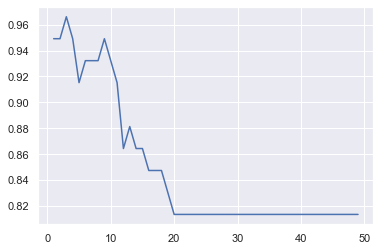

In [99]:
from sklearn.neighbors import KNeighborsClassifier
KNN_accuracy =[]
for k in range(1,50):
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN_model.fit(X_train, y_train)
    KNN_accuracy.append(KNN_model.score(X_test, y_test))

plt.plot(range(1,50),KNN_accuracy)

In [100]:
max_accuracy=max(KNN_accuracy) #Gives the value of maximum accuracy with respect to k value
print(max_accuracy)
k_final = KNN_accuracy.index(max_accuracy) #Gives the corresponding value of k where it has maximum accuracy
print(k_final)

0.9661016949152542
2


Build the KNN model taking k from above

In [160]:
# Create the KNN model
KNN_model = KNeighborsClassifier(n_neighbors= k_final , weights = 'distance' )

# Fit the KNN model on train data
KNN_model.fit(X_train, y_train)

# Predict the output on test data of KNN model
KNN_y_predict = KNN_model.predict(X_test)
print("Parameters of KNN model is: \n",KNN_model.fit(X_train, y_train))
print("The predicted output for test data in KNN model is: \n",KNN_y_predict)

Parameters of KNN model is: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')
The predicted output for test data in KNN model is: 
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1]


# Accuracy of KNN model on train and test data

In [102]:
KNN_train_accuracy = KNN_model.score(X_train, y_train)
print("Accuracy of KNN model on Train data is {0:.4f}%".format(KNN_train_accuracy))
KNN_test_accuracy = KNN_model.score(X_test, y_test)
print("Accuracy of KNN model on Test data is {0:.4f}%".format(KNN_test_accuracy))

Accuracy of KNN model on Train data is 1.0000%
Accuracy of KNN model on Test data is 0.9492%


# Support Vector Machine Model

In [163]:
from sklearn import svm

# Create the SVM model
SVM_model = svm.SVC(gamma=0.03, C=35)

# Fit the SVM model on train data
SVM_model.fit(X_train , y_train)

# Predict the output on test data of SVM model
SVM_y_predict = SVM_model.predict(X_test)

print("Parameters of SVM model is: \n",SVM_model.fit(X_train , y_train))
print("The predicted output for test data in SVM model is: \n",SVM_y_predict)

Parameters of SVM model is: 
 SVC(C=35, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The predicted output for test data in SVM model is: 
 [1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1]


# Accuracy of SVM model on train and test data

In [108]:
SVM_train_accuracy = SVM_model.score(X_train, y_train)
print("Accuracy of SVM model on Train data is {0:.4f}%".format(SVM_train_accuracy))
SVM_test_accuracy = SVM_model.score(X_test, y_test)
print("Accuracy of SVM model on Test data is {0:.4f}%".format(SVM_test_accuracy))

Accuracy of SVM model on Train data is 0.9706%
Accuracy of SVM model on Test data is 0.9153%


# 7. Train a meta-classifier and note the accuracy on test data (10 points)

# Stacking Classifier with logistic regression as meta classifier

In [164]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier

warnings.simplefilter('ignore')

RF_model = RandomForestClassifier(random_state=RANDOM_SEED)

sclf = StackingCVClassifier(classifiers=[NB_model, KNN_model, SVM_model, RF_model], 
                          meta_classifier=Logistic_model)

# Fit the Stacking classifier on train data
sclf.fit(X_train , y_train)

# Predict the output on test data of Stacking classifier
sclf_y_predict = sclf.predict(X_test)

print("Parameters of Stacking classifier is: \n",sclf.fit(X_train , y_train))
print("The predicted output for test data in Stacking classifier is: \n",sclf_y_predict)



Parameters of Stacking classifier is: 
 StackingCVClassifier(classifiers=[GaussianNB(priors=None, var_smoothing=1e-09),
                                  KNeighborsClassifier(algorithm='auto',
                                                       leaf_size=30,
                                                       metric='minkowski',
                                                       metric_params=None,
                                                       n_jobs=None,
                                                       n_neighbors=2, p=2,
                                                       weights='distance'),
                                  SVC(C=35, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma=0.03, kernel='rbf',
                                      max_iter=-1, probab...
                                                        intercept_scaling=1

# Accuracy of Stacking classifier

In [167]:
print('3-fold cross validation:\n')

for clf, label in zip([NB_model, KNN_model, SVM_model, RF_model, sclf], 
                      ['Naive Bayes',
                       'KNN', 
                       'Support Vector Machine', 
                       'Random Forest',
                       'Stacking Classifier']):
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.7692 (+/- 0.0251) [Naive Bayes]
Accuracy: 0.8410 (+/- 0.0891) [KNN]
Accuracy: 0.8256 (+/- 0.0523) [Support Vector Machine]
Accuracy: 0.8256 (+/- 0.0192) [Random Forest]
Accuracy: 0.8410 (+/- 0.0441) [Stacking Classifier]


# 8. Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy (10 points)

# Baggingv Classifier:

In [173]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
encoder_object = LabelEncoder()
#y = encoder_object.fit_transform(y)

#Base Learners
#dab_clf = AdaBoostClassifier(n_estimators=5,learning_rate=0.001)
classifier_array = [NB_model, KNN_model, SVM_model, RF_model, Logistic_model]
labels = [clf.__class__.__name__ for clf in classifier_array]
normal_accuracy = []
normal_std = []
bagging_accuracy = []
bagging_std = []
for clf in classifier_array:
    cv_scores = model_selection.cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=3, random_state=RANDOM_SEED)
    bagging_scores = model_selection.cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)
    
    normal_accuracy.append(np.round(cv_scores.mean(),4))
    normal_std.append(np.round(cv_scores.std(),4))
    
    bagging_accuracy.append(np.round(bagging_scores.mean(),4))
    bagging_std.append(np.round(bagging_scores.std(),4))
    
    print("Accuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))
    print("Accuracy: %0.4f (+/- %0.4f) [Bagging %s]\n" % (bagging_scores.mean(), bagging_scores.std(), clf.__class__.__name__))

Accuracy: 0.7692 (+/- 0.0251) [Normal GaussianNB]
Accuracy: 0.8154 (+/- 0.0699) [Bagging GaussianNB]

Accuracy: 0.8410 (+/- 0.0891) [Normal KNeighborsClassifier]
Accuracy: 0.8615 (+/- 0.0628) [Bagging KNeighborsClassifier]

Accuracy: 0.8256 (+/- 0.0523) [Normal SVC]
Accuracy: 0.8615 (+/- 0.0879) [Bagging SVC]

Accuracy: 0.8256 (+/- 0.0192) [Normal RandomForestClassifier]
Accuracy: 0.8462 (+/- 0.0665) [Bagging RandomForestClassifier]

Accuracy: 0.8359 (+/- 0.0476) [Normal LogisticRegression]
Accuracy: 0.8615 (+/- 0.0784) [Bagging LogisticRegression]



# Boosting Classifiers:

In [178]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier

ada_boost = AdaBoostClassifier(n_estimators=5)
grad_boost = GradientBoostingClassifier(n_estimators=10)
xgb_boost = XGBClassifier(max_depth=5, learning_rate=0.001)
ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')

boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']

for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):
    scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: {0:.4f}, Variance: (+/-) {1:.4f} [{2}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.7949, Variance: (+/-) 0.0384 [Ada Boost]
Accuracy: 0.8051, Variance: (+/-) 0.0566 [Gradient Boost]
Accuracy: 0.8308, Variance: (+/-) 0.0453 [XG Boost]
Accuracy: 0.8154, Variance: (+/-) 0.0435 [Ensemble]


# 9. Compare all the models (minimum 5) and pick the best one among them (10 points)

# Performance of Logistic Regression model

In [180]:
from sklearn import metrics

In [181]:
print("Logistic Regression Classification Report")
print(metrics.classification_report(y_test, Logistic_y_predict, labels=[1, 0]))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.86      0.98      0.92        45
           0       0.88      0.50      0.64        14

    accuracy                           0.86        59
   macro avg       0.87      0.74      0.78        59
weighted avg       0.87      0.86      0.85        59



We can see our true positive numbers with value 1 is of precision (out of all predicted what fration is actually true) = 86% and recall (out of all actual true what fraction is identified) = 98% is f1 score of true = 92% is above 90%

# Performance of Naive Bayes model

In [182]:
print("Naive Bayes Classification Report")
print(metrics.classification_report(y_test, NB_y_predict, labels=[1, 0]))

Naive Bayes Classification Report
              precision    recall  f1-score   support

           1       0.88      0.80      0.84        45
           0       0.50      0.64      0.56        14

    accuracy                           0.76        59
   macro avg       0.69      0.72      0.70        59
weighted avg       0.79      0.76      0.77        59



We can see our true positive numbers with value 1 is of precision (out of all predicted what fration is actually true) = 88% and recall (out of all actual true what fraction is identified) = 80% is f1 score of true = 84% is above 80%

# Performance of KNN model

In [183]:
print("KNN Classification Report")
print(metrics.classification_report(y_test, KNN_y_predict, labels=[1, 0]))

KNN Classification Report
              precision    recall  f1-score   support

           1       0.96      0.98      0.97        45
           0       0.92      0.86      0.89        14

    accuracy                           0.95        59
   macro avg       0.94      0.92      0.93        59
weighted avg       0.95      0.95      0.95        59



We can see our true positive numbers with value 1 is of precision (out of all predicted what fration is actually true) = 96% and recall (out of all actual true what fraction is identified) = 98% is f1 score of true = 97% is above 95%

# Performance of SVM model

In [184]:
print("SVM Classification Report")
print(metrics.classification_report(y_test, SVM_y_predict, labels=[1, 0]))

SVM Classification Report
              precision    recall  f1-score   support

           1       0.92      0.98      0.95        45
           0       0.91      0.71      0.80        14

    accuracy                           0.92        59
   macro avg       0.91      0.85      0.87        59
weighted avg       0.91      0.92      0.91        59



We can see our true positive numbers with value 1 is of precision (out of all predicted what fration is actually true) = 92% and recall (out of all actual true what fraction is identified) = 98% is f1 score of true = 95% 

# Performance of Stacking Classifier

In [185]:
print("Stacking Classifier Report")
print(metrics.classification_report(y_test, sclf_y_predict, labels=[1, 0]))

Stacking Classifier Report
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        45
           0       1.00      0.64      0.78        14

    accuracy                           0.92        59
   macro avg       0.95      0.82      0.86        59
weighted avg       0.92      0.92      0.91        59



We can see our true positive numbers with value 1 is of precision (out of all predicted what fration is actually true) = 90% and recall (out of all actual true what fraction is identified) = 100% is f1 score of true = 95% 

# From above analysis we say that Stacking Classifier model is best for this data having highest recall of 100% and f1 score of 95%

Stacking classifier is the best for above case as among all the Parkinson's disease patient it manages to recognise all of them because Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.